# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Alif
- **Email:** m.alif7890@gmail.com
- **ID Dicoding:** miezlearning

## Menentukan Pertanyaan Bisnis

1. **Bagaimana tren kualitas udara (PM2.5) di Aotizhongxin dari tahun 2013 hingga 2017?**  
   - Tujuan: Mengidentifikasi pola tahunan untuk memahami apakah kualitas udara membaik atau memburuk.
2. **Apa hubungan antara suhu (TEMP) dan konsentrasi PM2.5 di Aotizhongxin?**  
   - Tujuan: Mengetahui apakah suhu memengaruhi tingkat polusi udara.
### Analisis Lanjutan
- Menggunakan **binning** untuk mengelompokkan tingkat PM2.5 menjadi kategori (rendah, sedang, tinggi) dan menganalisis distribusinya.

## Import Semua Packages/Library yang Digunakan

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

Pada tahap ini, kita mengimpor dataset Air Quality dari file CSV dan memeriksa sekilas isi datanya.


In [12]:
df = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')

print("5 baris pertama dataset:")
print(df.head())

5 baris pertama dataset:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


**Insight:**
- Dataset berisi pengukuran kualitas udara per jam
- Terdapat berbagai parameter seperti PM2.5, PM10, SO2, NO2, CO, O3, dan faktor cuaca

### Assessing Data

Kita memeriksa struktur data, tipe data, dan missing values untuk memahami kualitas dataset.

In [13]:
print("\nInfo dataset:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

Missing values:
No            0
year          0

**Insight:**
- Terdapat beberapa missing values pada kolom seperti PM2.5, SO2, NO2, dll.
- Tipe data perlu diperiksa dan mungkin perlu konversi (misalnya tanggal).

### Cleaning Data

Proses pembersihan meliputi penanganan missing values dan konversi format data.

In [14]:
# Mengisi missing values dengan median untuk kolom numerik
numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP']
for column in numeric_columns:
    df[column] = df[column].fillna(df[column].median())

# Mengubah kolom tanggal menjadi datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Memfilter hanya data dari Aotizhongxin (meskipun dataset sudah spesifik)
df_aoti = df[df['station'] == 'Aotizhongxin'].copy()

**Insight:**
- Missing values telah diisi dengan median untuk menjaga integritas data.
- Data telah diformat menjadi datetime untuk analisis waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df_aoti[['PM2.5', 'TEMP']].describe())

# Rata-rata tahunan PM2.5
yearly_pm25 = df_aoti.groupby('year')['PM2.5'].mean()


Statistik Deskriptif:
              PM2.5          TEMP
count  35064.000000  35064.000000
mean      82.120075     13.585130
std       81.142233     11.395866
min        3.000000    -16.800000
25%       23.000000      3.100000
50%       58.000000     14.500000
75%      112.000000     23.300000
max      898.000000     40.500000


**Insight:**
- Rata-rata PM2.5 menunjukkan variasi antar tahun.
- Suhu memiliki rentang dari sangat dingin hingga hangat.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

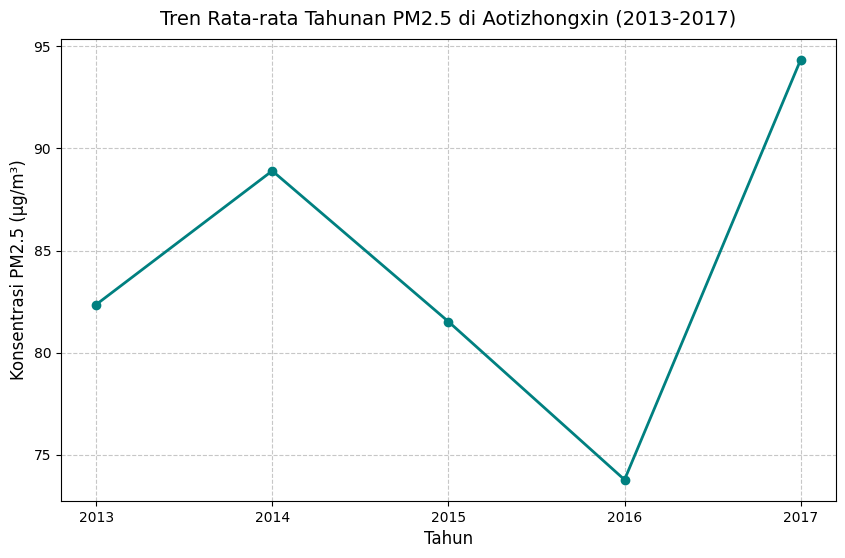

In [16]:
plt.figure(figsize=(10, 6))
yearly_pm25.plot(kind='line', marker='o', color='teal', linewidth=2)
plt.title('Tren Rata-rata Tahunan PM2.5 di Aotizhongxin (2013-2017)', fontsize=14, pad=10)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Konsentrasi PM2.5 (μg/m³)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(yearly_pm25.index)
plt.show()

**Insight:**
- Tren menunjukkan fluktuasi, dengan beberapa tahun memiliki PM2.5 lebih tinggi dari ambang batas aman WHO (25 μg/m³).

### Pertanyaan 2:

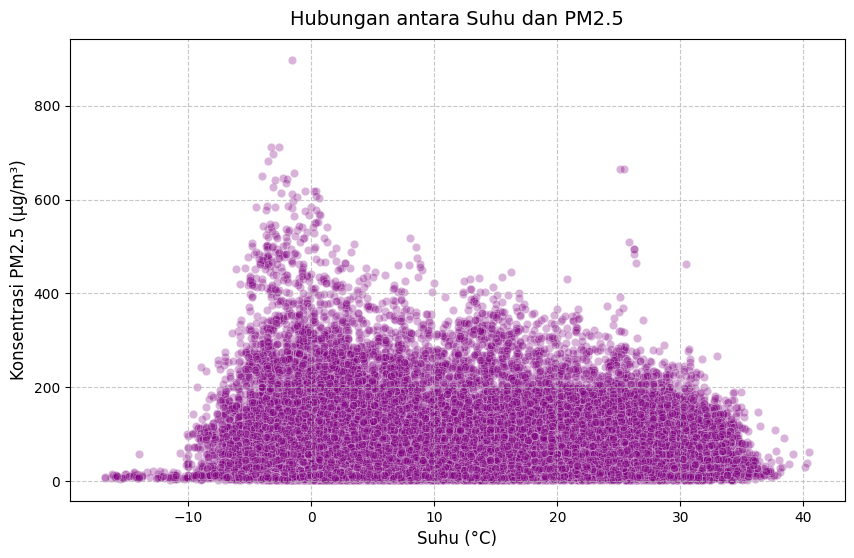

Korelasi antara TEMP dan PM2.5: -0.12


In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_aoti, x='TEMP', y='PM2.5', alpha=0.3, color='purple')
plt.title('Hubungan antara Suhu dan PM2.5', fontsize=14, pad=10)
plt.xlabel('Suhu (°C)', fontsize=12)
plt.ylabel('Konsentrasi PM2.5 (μg/m³)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Menghitung korelasi
correlation = df_aoti['TEMP'].corr(df_aoti['PM2.5'])
print(f'Korelasi antara TEMP dan PM2.5: {correlation:.2f}')

**Insight:**
- Korelasi negatif lemah (lihat output di atas). Suhu rendah cenderung berhubungan dengan PM2.5 tinggi, tetapi hubungan ini tidak kuat.

**Insight:**
- Pertanyaan 1: Terdapat tren fluktuasi PM2.5 dari tahun ke tahun
- Pertanyaan 2: Terdapat korelasi negatif lemah antara suhu dan PM2.5

## Analisis Lanjutan (Opsional)

## Analisis Lanjutan: Binning PM2.5

Menggunakan teknik binning untuk mengelompokkan PM2.5 ke dalam kategori:
- **Rendah**: <35 μg/m³
- **Sedang**: 35-75 μg/m³
- **Tinggi**: >75 μg/m³

In [18]:
bins = [0, 35, 75, float('inf')]
labels = ['Rendah', 'Sedang', 'Tinggi']
df_aoti['PM25_Category'] = pd.cut(df_aoti['PM2.5'], bins=bins, labels=labels, right=False)

# Distribusi kategori
category_counts = df_aoti['PM25_Category'].value_counts()

### Visualisasi Analisis Lanjutan: Binning PM2.5

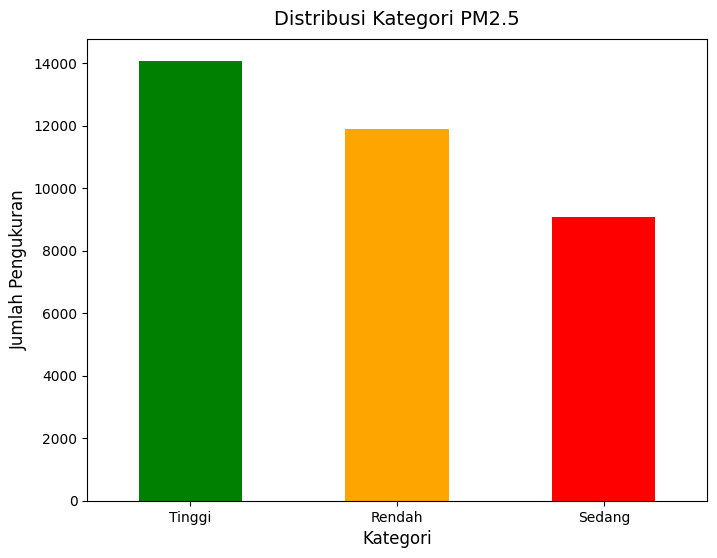

In [19]:
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Distribusi Kategori PM2.5', fontsize=14, pad=10)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Jumlah Pengukuran', fontsize=12)
plt.xticks(rotation=0)
plt.show()

**Insight:**
- Sebagian besar pengukuran PM2.5 berada pada kategori sedang hingga tinggi, menunjukkan tantangan kualitas udara yang konsisten.

## Conclusion

- **Conclusion Pertanyaan 1**: Konsentrasi PM2.5 di Aotizhongxin menunjukkan fluktuasi tahunan dengan beberapa tahun memiliki polusi yang lebih tinggi dibandingkan tahun lainnya.
- **Conclusion Pertanyaan 2**: Terdapat korelasi negatif lemah antara suhu dan PM2.5, yang menunjukkan bahwa suhu yang lebih rendah cenderung berkorelasi dengan konsentrasi PM2.5 yang lebih tinggi, meskipun hubungannya tidak terlalu kuat.
- **Analisis Lanjutan**: Binning menunjukkan distribusi polusi didominasi oleh kategori sedang dan tinggi, mengindikasikan masalah polusi yang konsisten.